<a href="https://colab.research.google.com/github/vadhri/distibuted-optimization/blob/main/graph_consensus/distributed_decentrarlized_gradient_descent_2nd_order.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
!pip install igraph

In [198]:
import igraph as ig
import numpy as np
import math


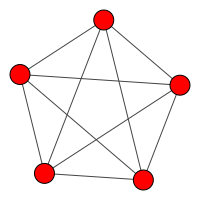

In [199]:
g = ig.Graph.Erdos_Renyi(n=5,m=10)
ig.plot(g, bbox=(0,0,200,200))

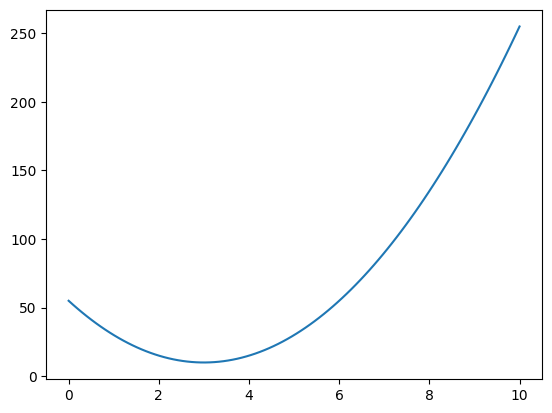

In [200]:
##
def f(x):
  return (x-1)**2+(x-2)**2+(x-3)**2+(x-4)**2+(x-5)**2

def grad_f(x):
  return 2*((x-1)+(x-2)+(x-3)+(x-4)+(x-5))

x = np.linspace(0, 10, 100)
y = f(x)

plt.plot(x, y)
plt.show()

[[0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]]
Converged at Iteration 222


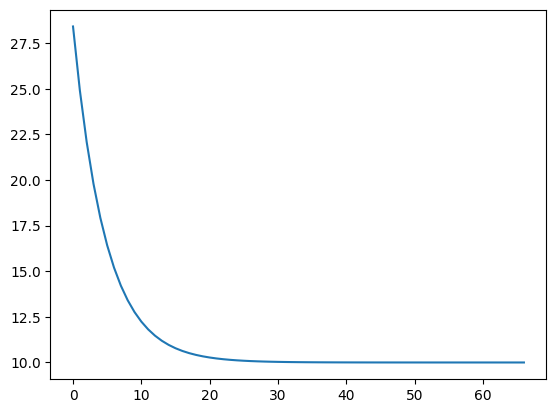

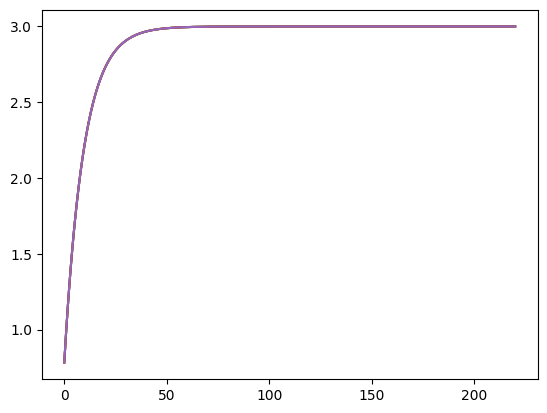

[3. 3. 3. 3. 3.]


In [201]:
N = g.vcount()
M = N
max_iters = 2000
eta = 0.01
tol = 1e-10
W = np.zeros((N,N))

x = np.random.rand(N)
z0 = np.linspace(0, 5, N)

history_x = []

for i in range(N):
  for j in g.neighbors(i):
    W[i,j] = 1/(1+max(g.degree(i), g.degree(j)))
    W[j,i] = W[i,j]
  W[i,i] = 1-np.sum(W[i, :])

print (W)

for iter in range(max_iters):
  if len(history_x) > 10 and np.std(history_x[-10:]) < tol:
    break
  z = W@x.T
  x = z - eta*grad_f(z)
  history_x.append(x.copy())

print(f"Converged at Iteration {iter+1}")

#plot history of loss
plt.plot(losses)
plt.show()

plt.plot(history_x)
plt.show()

print(history_x[-1])

In [202]:
# last 5 entries of history_x
np.std(history_x[-10:])

np.float64(9.582860467287664e-11)

Final x = [2.99805882 2.99805882 2.99805882 2.99805882 2.99805882] at iter = 68
std(x) = 1.9860273225978183e-16


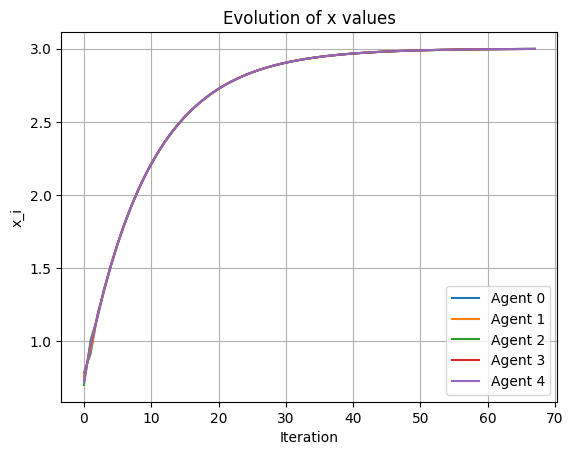

In [203]:
import numpy as np
import matplotlib.pyplot as plt
import igraph as ig

N = g.vcount()
max_iters = 100
eta = 0.01
tol = 1e-3
W = np.zeros((N, N))  # Fix here

def f(x):
    return x**4 + 0.5*x**2

def grad_f(x):
    return 4*x**3 + x

def f(x):
  return 0.5*x**2

def grad_f(x):
  return x

def f(x):
  return (x-1)**2+(x-2)**2+(x-3)**2+(x-4)**2+(x-5)**2

def grad_f(x):
  return 2*((x-1)+(x-2)+(x-3)+(x-4)+(x-5))

# Metropolis-Hastings weights
for i in range(N):
    for j in g.neighbors(i):
        W[i, j] = 1 / (1 + max(g.degree(i), g.degree(j)))
        W[j, i] = W[i, j]
    W[i, i] = 1 - np.sum(W[i, :])

# Initial values
x = np.random.rand(N)
y = grad_f(x)

history_x = []

for iter in range(max_iters):
    if len(history_x) > 10 and np.std(history_x[-10:]) < tol:
      break
    x_next = W @ x - eta * y
    y = W @ y + grad_f(x_next) - grad_f(x)
    x = x_next.copy()

    history_x.append(x.copy())

print(f"Final x = {x} at iter = {iter}")
print(f"std(x) = {np.std(x)}")

# Plot evolution of x
history_x_np = np.array(history_x)
for i in range(N):
    plt.plot(history_x_np[:, i], label=f'Agent {i}')
plt.title("Evolution of x values")
plt.xlabel("Iteration")
plt.ylabel("x_i")
plt.grid()
plt.legend()
plt.show()
